In [11]:
# Bibliotecas:

import matplotlib.pyplot as plt

## Clases:

### SearchProblem:

In [12]:
class SearchProblem(object):
    """The abstract class for a formal problem. A new domain subclasses this,
    overriding `actions` and `results`, and perhaps other methods.
    The default heuristic is 0 and the default action cost is 1 for all states.
    When you create an instance of a subclass, specify `initial`, and `goal` states 
    (or give an `is_goal` method) and perhaps other keyword args for the subclass."""

    def __init__(self, initial, goal=None, **kwds): 
        """The constructor specifies the initial state, and possibly a goal
        state, if there is a unique goal. Your subclass's constructor can add
        other arguments."""
        self.initial = initial
        self.goal = goal

        
    def actions(self, node):
        """Return the actions that can be executed in the given
        state. The result would typically be a list, but if there are
        many actions, consider yielding them one at a time in an
        iterator, rather than building them all at once."""        
        raise NotImplementedError
        
    def result(self, node, action): 
        """Return the state that results from executing the given
        action in the given state. The action must be one of
        self.actions(state)."""
        raise NotImplementedError
        
    def is_goal(self, node): 
        """Return True if the state is a goal. The default method compares the
        state to self.goal or checks for state in self.goal if it is a
        list, as specified in the constructor. Override this method if
        checking against a single self.goal is not enough."""      
        return self.goal == node
    
    def action_cost(self, s, a, s1): 
        """Return the cost of a solution path that arrives at state s1 from
        state s via action a. If the problem
        is such that the path doesn't matter, this function will only look at
        state s1.  If the path does matter, it will consider state s1
        and action a. The default method costs 1 for every step in the path."""
        return 1

    def h(self, node):
     raise NotImplementedError 
     
    def g(self, node):
     return node.path_cost()

    def f(self, node):
     return self.g(node) + self.h(node)       

### Node:

In [13]:
class Node:
    def __init__(self, state='', parent=None, action=None, cost=1):
        self.state = state
        self.parent = parent
        self.action = action
        self.cost = cost

    def states_path(self):
        if self.parent == None:
            return [self]
        return self.parent.states_path() + [self]
    
    def actions_path(self):
        if self.parent == None:
            return []
        return self.parent.actions_path() + [self.action]        

    def __eq__(self, node):
        if node:
            return self.state == node.state
        return False    

    def path_cost(self):
        total_cost = 0
        if self.parent is None:
            return total_cost
        total_cost += self.cost + self.parent.path_cost()
        return total_cost 

    def __repr__(self):
        return str(self.state)  

### PriorityQueue:

In [14]:
import heapq
class PriorityQueue:
    """
      Implements a priority queue data structure. Each inserted item
      has a priority associated with it and the client is usually interested
      in quick retrieval of the lowest-priority item in the queue. This
      data structure allows O(1) access to the lowest-priority item.
    """
    def  __init__(self):
        self.heap = []
        self.count = 0

    def push(self, item, priority):
        entry = (priority, self.count, item)
        heapq.heappush(self.heap, entry)
        self.count += 1

    def pop(self):
        (_, _, item) = heapq.heappop(self.heap)
        return item

    def isEmpty(self):
        return len(self.heap) == 0

    def update(self, item, priority):
        # If item already in priority queue with higher priority, update its priority and rebuild the heap.
        # If item already in priority queue with equal or lower priority, do nothing.
        # If item not in priority queue, do the same thing as self.push.
        for index, (p, c, i) in enumerate(self.heap):
            if i == item:
                if p <= priority:
                    break
                del self.heap[index]
                self.heap.append((priority, c, item))
                heapq.heapify(self.heap)
                break
        else:
            self.push(item, priority)        

### Expand (Método):

In [15]:
def expand(problem, node):
    childs = []
    for action in problem.actions(node):
        childs.append(problem.result(node, action))
    return childs    

### UCS

In [16]:
def UCS(problem, fringe=PriorityQueue()):
    closed = []
    fringe.push(problem.initial, 0)

    while(True):
        node = fringe.pop()
        if problem.is_goal(node):
            print('Expanded Nodes: {}'.format(len(closed))) 
            return node
        if node not in closed: 
            closed.append(node)
            for child in expand(problem, node):
                fringe.push(child, problem.g(child))

### Voraz:

In [17]:
def voraz(problem, fringe):
    closed = []
    fringe.push(problem.initial, 0)

    while(True):
        node = fringe.pop()
        if problem.is_goal(node): 
            print('Expanded Nodes: {}'.format(len(closed)))
            return node
        if node not in closed: 
            closed.append(node)
            for child in expand(problem, node):
                fringe.push(child, problem.h(child))

### A*:

In [18]:
def aStar(problem, fringe):
    closed = []
    fringe.push(problem.initial, 0)

    while(True):
        node = fringe.pop()
        if problem.is_goal(node):
            print('Expanded Nodes: {}'.format(len(closed)))
            return node
        if node not in closed: 
            closed.append(node)
            for child in expand(problem, node):
                fringe.push(child, problem.f(child))

# __Laboratorio 4: Búsqueda informada (Parte 2)__

El siguiente taller de corresponde a la aplicación de algoritmos de búsqueda informada en la solución de problemas en inteligencia artificial. Para el desarrollo del laboratorio tenga en cuenta lo siguiente:

* La actividad puede realizarse en grupos de máximo 4 personas
* La solución al taller debe enviarse en un notebook a través de Moodle. Se debe adjuntar el archivo. No se aceptan enlaces
* El objetivo del taller es hacer énfasis en el proceso de modelamiento. Por esta razón se deben utilizar como base para la soluciones propuestas las clases y métodos disponibles en la sección recursos. __Otras implementaciones no serán tenidas en cuenta__.
* Si se detecta cualquier tipo de fraude, la calificación de 0.0.
* El taller deberá ser sustentando por uno de los miembros del grupo
* Las soluciones propuestas deben cumplir con las recomendaciones de código limpio especificadas en el [PEP8](https://pep8.org/), de lo contrario será penalizado

## __1. (1.5 Puntos) Rompecabezas de 8-piezas__

Solucione el rompecabezas de 8 piezas suponiendo que todos los movimientos cuestan 1 punto y utilizando la configuración `[1, 0, 2, 7, 4, 3, 8, 6, 5]` como estado inicial. 
<center>

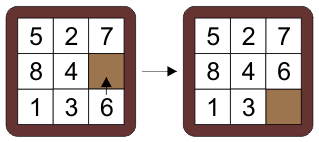
</center>
Para este caso encuentre:

* La solución utilizando UCS
* La solución con los algoritmos Voraz y A* utilizando como heurística el número de piezas mal ubicadas
* La solución con los algoritmos Voraz y A* utilizando la distancia de manhattan como heurística.
* Compare la cantidad de nodos expandidos por ambas heurísticas en el algortimo A* contra la cantidad de nodos expandidos por UCS
* Compare el costo de las soluciones obtenidas por ambas heurísticas en el algoritmo Voraz contra el costo obtenido por UCS
* Proponga una nueva heurística admisible que expanda menos nodos que manhattan. 
* Seleccione la heurística que presentó el mejor desempeño y calcule la solución para el estado inicial `[1, 4, 2, 0, 7, 5, 3, 6, 8]` utilizando A*. Compare la cantidad de nodos exapndidos con UCS para este estado inicial
* __NOTA:__ La ejecución de UCS para el estado inicial `[1, 4, 2, 0, 7, 5, 3, 6, 8]` puede tomar aproximadamente 60 minutos si se realiza en colab. Se sugiere ejecutarlo local (o tener paciencia)

## Problema Puzzle con heurística de Piezas Mal Ubicadas

### Clase Puzzle con Heurística de Piezas Mal Ubicadas

In [19]:
class PuzzleH1(SearchProblem):

    def __init(self, initial, goal):
        self.initial = initial
        self.goal = goal


    def actions(self, node):
        actions = [(1,3),(0,2,4),(1,5),(0,4,6),(1,3,5,7),(2,4,8),(3,7),(4,6,8),(5,7)]
        return actions[node.state.index(0)]
    
    def result(self, node, action):
        new_state  = node.state.copy()
        cero = node.state.index(0)
        new_state[cero], new_state[action] = new_state[action], new_state[cero]
        return Node(state=new_state, parent=node, action=action)
    
    def h(self, node):
        sum = 0
        for i in node.state:
            if node.state[i] != self.goal.state[i]:
                sum +=1
        return sum
    
    def g(self, node):
        return super().g(node)
    
    def f(self, node):
        return super().f(node)    

### Algoritmo UCS para Puzzle

In [20]:
initial = Node([1,0,2,7,4,3,8,6,5])
goal = Node([1,2,3,4,5,6,7,8,0])

problem = PuzzleH1(initial, goal)
fringe = PriorityQueue()
solution = UCS(problem, fringe)
print("Action Sequence: ", solution.actions_path())
print("Cost: ", solution.path_cost())

Expanded Nodes: 398
Action Sequence:  [2, 5, 8, 7, 6, 3, 4, 5, 8]
Cost:  9


### Voraz Heurística Piezas Mal Ubicadas

In [21]:
initial2 = Node([1,0,2,7,4,3,8,6,5])
goal2 = Node([1,2,3,4,5,6,7,8,0])
problem2 = PuzzleH1(initial2, goal2)
fringe2 = PriorityQueue()
solution2 = voraz(problem2, fringe2)
print("Action Sequence: ", solution2.actions_path())
print("Cost: ", solution2.path_cost())

Expanded Nodes: 10
Action Sequence:  [2, 5, 8, 7, 6, 3, 4, 5, 8]
Cost:  9


### A* Heurística Piezas Mal Ubicadas

In [22]:
initial3 = Node([1,0,2,7,4,3,8,6,5])
goal3 = Node([1,2,3,4,5,6,7,8,0])
problem3 = PuzzleH1(initial3, goal3)
fringe3 = PriorityQueue()
solution3 = aStar(problem3, fringe3)
print("Action Sequence: ", solution3.actions_path())
print("Cost: ", solution3.path_cost())

Expanded Nodes: 24
Action Sequence:  [2, 5, 8, 7, 6, 3, 4, 5, 8]
Cost:  9


## Problema Puzzle con Heurística Distancia de Manhattan:

### Clase Puzzle con Heurística Distancia de Manhattan

In [12]:
def manhattan(xyGrid, xySolucion):
    return abs(xySolucion[0]-xyGrid[0]) + abs(xySolucion[1] - xyGrid[1])

class PuzzleH2(SearchProblem):
    def __init__(self, initial, goal):
        self.initial = initial
        self.goal = goal
    
    def actions(self, node):
        return super().actions(node)

    def actions(self, node):
        actions = [(1,3),(0,2,4),(1,5),(0,4,6),(1,3,5,7),(2,4,8),(3,7),(4,6,8),(5,7)]
        return actions[node.state.index(0)]
    
    def result(self, node, action):
        new_state  = node.state.copy()
        cero = node.state.index(0)
        new_state[cero], new_state[action] = new_state[action], new_state[cero]
        return Node(state=new_state, parent=node, action=action)
    
    def h(self, node):
        sum = 0
        xyGrid = [(0,0),(0,1),(0,2),(1,0),(1,1),(1,2),(2,0),(2,1),(2,2)]
        xySolucion = [(2,2),(0,0),(0,1),(0,2),(1,0),(1,1),(1,2),(2,0),(2,1)]
        for i in range(len(node.state)):
            sum += manhattan(xyGrid[node.state.index(i)],xySolucion[i])
        return sum
        
    
    def g(self, node):
        return super().g(node)
    
    def f(self, node):
        return super().f(node)  

### Voraz Heurística Distancia de Manhattan

In [19]:
initial4 = Node([1,0,2,7,4,3,8,6,5])
goal4 = Node([1,2,3,4,5,6,7,8,0])
problem4 = PuzzleH2(initial4, goal4)
fringe4 = PriorityQueue()
solution4 = voraz(problem4, fringe4)
print("Action Sequence: ", solution4.actions_path())
print("Cost: ", solution4.path_cost())

Expanded Nodes: 9
Action Sequence:  [2, 5, 8, 7, 6, 3, 4, 5, 8]
Cost:  9


### A* Heurística Distancia de Manhattan

In [14]:
initial5 = Node([1,0,2,7,4,3,8,6,5])
goal5 = Node([1,2,3,4,5,6,7,8,0])
problem5 = PuzzleH2(initial5, goal5)
fringe5 = PriorityQueue()
solution5 = aStar(problem5, fringe5)
print("Action Sequence: ", solution5.actions_path())
print("Cost: ", solution5.path_cost())

Expanded Nodes: 9
Action Sequence:  [2, 5, 8, 7, 6, 3, 4, 5, 8]
Cost:  9


## Comparación de Cantidad de nodos expandidos por ambas heurísticas en el Algoritmo A* contra la cantidad de nodos expandidos por UCS

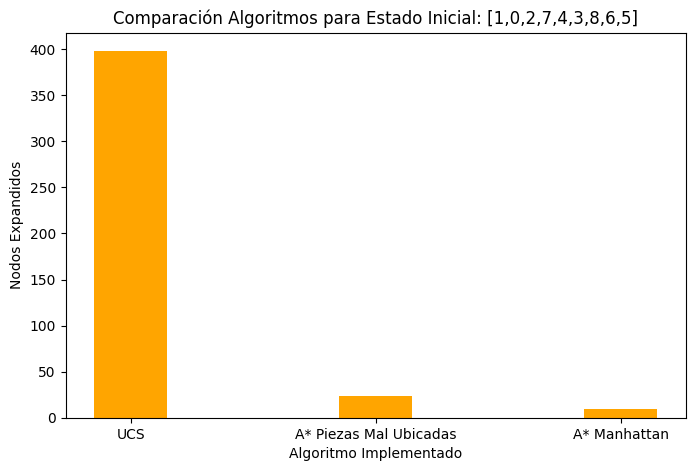

In [7]:
grafico = {'UCS': 398,
           'A* Piezas Mal Ubicadas': 24,
           'A* Manhattan': 9}
keys = list(grafico.keys())
values = list(grafico.values())
fig = plt.figure(figsize=(8,5))
plt.bar(keys, values, width=0.3, color='orange')

plt.xlabel('Algoritmo Implementado')
plt.ylabel('Nodos Expandidos')
plt.title('Comparación Algoritmos para Estado Inicial: [1,0,2,7,4,3,8,6,5]')
plt.show()


### Comparación del Costo de las soluciones obtenidas por ambas Heurísticas en el Algoritmo Voraz contra el costo obtenido por UCS

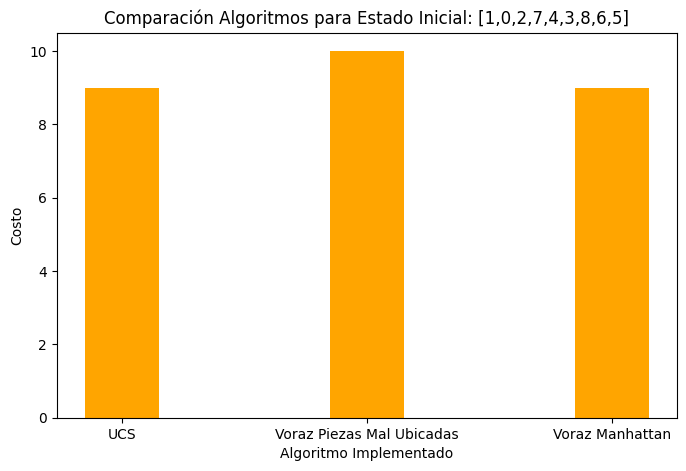

In [23]:
grafico = {'UCS': 9,
           'Voraz Piezas Mal Ubicadas': 10,
           'Voraz Manhattan': 9}
keys = list(grafico.keys())
values = list(grafico.values())
fig = plt.figure(figsize=(8,5))
plt.bar(keys, values, width=0.3, color='orange')

plt.xlabel('Algoritmo Implementado')
plt.ylabel('Costo')
plt.title('Comparación Algoritmos para Estado Inicial: [1,0,2,7,4,3,8,6,5]')
plt.show()

# Soluciones Con Estado Inicial [1,4,2,0,7,5,3,6,8]

### UCS

In [23]:
initial6 = Node([1,4,2,0,7,5,3,6,8])
goal6 = Node([1,2,3,4,5,6,7,8,0])
problem6 = PuzzleH2(initial6, goal6)
fringe6 = PriorityQueue()
solution6 = UCS(problem6, fringe6)
print("Action Sequence: ", solution6.actions_path())
print("Cost: ", solution6.path_cost())

Expanded Nodes: 118339
Action Sequence:  [4, 7, 6, 3, 4, 7, 8, 5, 4, 3, 6, 7, 4, 1, 2, 5, 8, 7, 6, 3, 4, 5, 8]
Cost:  23


### Voraz Manhattan

In [56]:
print('################################################')
print('# Voraz con Heurística Distancia de Manhattan: #')
print('################################################')
print()

initial7 = Node([1,4,2,0,7,5,3,6,8])
goal7 = Node([1,2,3,4,5,6,7,8,0])
problem7 = PuzzleH2(initial7, goal7)
fringe7 = PriorityQueue()
solution7 = voraz(problem7, fringe7)
print("Action Sequence: ", solution7.actions_path())
print("Cost: ", solution7.path_cost())

################################################
# Voraz con Heurística Distancia de Manhattan: #
################################################

Expanded Nodes: 118
Action Sequence:  [4, 7, 6, 3, 4, 7, 8, 5, 4, 1, 2, 5, 4, 3, 6, 7, 8, 5, 4, 7, 8, 5, 4, 7, 6, 3, 4, 5, 8]
Cost:  29


### A* Manhattan

In [55]:
print('#############################################')
print('# A* con Heurística Distancia de Manhattan: #')
print('#############################################')
print()

initial8 = Node([1,4,2,0,7,5,3,6,8])
goal8 = Node([1,2,3,4,5,6,7,8,0])
problem8 = PuzzleH2(initial8, goal8)
fringe8 = PriorityQueue()
solution8 = aStar(problem8, fringe8)
print("Action Sequence: ", solution8.actions_path())
print("Cost: ", solution8.path_cost())

#############################################
# A* con Heurística Distancia de Manhattan: #
#############################################

Expanded Nodes: 2269
Action Sequence:  [4, 7, 6, 3, 4, 7, 8, 5, 4, 3, 6, 7, 4, 1, 2, 5, 8, 7, 6, 3, 4, 5, 8]
Cost:  23


## Heurística Admisible Propuesta por el Grupo

### Clase Puzzle con Heurística propuesta por el grupo:

In [40]:
# Método para encontrar conflictos en las filas y columnas, y así implementar una heurística más eficiente
def conflictos(state):
    
    # Se convirte el estado del nodo en arreglos bidimensionales
    filas = [state[:3],state[3:6],state[6:9]] # Filas separadas en arreglo 2d
    columnas = [[state[0], state[3], state[6]],[state[1], state[4], state[7]],[state[2], state[5], state[8]]] # Columnas separadas en arreglo 2d
    
    #Variables locales
    conflictos = 0 
    aux_filas = [[1,2,3],[4,5,6],[7,8,9]] # Orden en el que debería estar el node.state en su estado ideal a nivel de filas
    aux_columnas = [[1,4,7],[2,5,8],[3,6,9]] # # Orden en el que debería estar el node.state en su estado ideal a nivel de columnas

    for i in range(len(filas)):
        # Revisa si los números se encuentran el las filas correspondientes y si existe algun conflicto
        if aux_filas[i][0] in filas[i]:
             
            if aux_filas[i][1] in filas[i] and (filas[i].index(aux_filas[i][0]) > filas[i].index(aux_filas[i][1])):
                conflictos += 1

            if aux_filas[i][2] in filas[i] and (filas[i].index(aux_filas[i][0]) > filas[i].index(aux_filas[i][2])):
                conflictos += 1

        if (aux_filas[i][1] in filas[i] and aux_filas[i][2] in filas[i]) and (filas[i].index(aux_filas[i][1]) > filas[i].index(aux_filas[i][2])):
            conflictos += 1
    
    for i in range(len(columnas)):
        # Revisa si los números se encuentran el las columnas correspondientes y si existe algun conflicto
        if aux_columnas[i][0] in columnas[i]:
             
            if aux_columnas[i][1] in columnas[i] and (columnas[i].index(aux_columnas[i][0]) > columnas[i].index(aux_columnas[i][1])):
                conflictos += 1

            if aux_columnas[i][2] in columnas[i] and (columnas[i].index(aux_columnas[i][0]) > columnas[i].index(aux_columnas[i][2])):
                conflictos += 1

        if (aux_columnas[i][1] in columnas[i] and aux_columnas[i][2] in columnas[i]) and (columnas[i].index(aux_columnas[i][1]) > columnas[i].index(aux_columnas[i][2])):
            conflictos += 1
    
    return conflictos * 2

def manhattan(xyGrid, xySolucion):
    return abs(xySolucion[0]-xyGrid[0]) + abs(xySolucion[1] - xyGrid[1])

class PuzzleH3(SearchProblem):
    def __init__(self, initial, goal):
        self.initial = initial
        self.goal = goal
    
    def actions(self, node):
        return super().actions(node)

    def actions(self, node):
        actions = [(1,3),(0,2,4),(1,5),(0,4,6),(1,3,5,7),(2,4,8),(3,7),(4,6,8),(5,7)]
        return actions[node.state.index(0)]
    
    def result(self, node, action):
        new_state  = node.state.copy()
        cero = node.state.index(0)
        new_state[cero], new_state[action] = new_state[action], new_state[cero]
        return Node(state=new_state, parent=node, action=action)
    
    def h(self, node):
        sum = 0
        xyGrid = [(0,0),(0,1),(0,2),(1,0),(1,1),(1,2),(2,0),(2,1),(2,2)]
        xySolucion = [(2,2),(0,0),(0,1),(0,2),(1,0),(1,1),(1,2),(2,0),(2,1)]
        for i in range(len(node.state)):
            sum += manhattan(xyGrid[node.state.index(i)],xySolucion[i])
        return sum + conflictos(node.state)
        
    
    def g(self, node):
        return super().g(node)
    
    def f(self, node):
        return super().f(node)  

### Voraz Con Heurística propuesta por el Grupo:

In [58]:
print('################################################')
print('# Voraz con Heurística propuesta por el Grupo: #')
print('################################################')


initial9 = Node([1,4,2,0,7,5,3,6,8])
goal9 = Node([1,2,3,4,5,6,7,8,0])
problem9 = PuzzleH3(initial8, goal8)
fringe9 = PriorityQueue()
solution9 = voraz(problem9, fringe9)
print("Action Sequence: ", solution9.actions_path())
print("Cost: ", solution9.path_cost())

################################################
# Voraz con Heurística propuesta por el Grupo: #
################################################
Expanded Nodes: 192
Action Sequence:  [4, 5, 8, 7, 6, 3, 4, 5, 8, 7, 4, 1, 2, 5, 8, 7, 4, 5, 2, 1, 4, 7, 8, 5, 2, 1, 4, 5, 2, 1, 4, 3, 0, 1, 2, 5, 4, 1, 0, 3, 4, 5, 8]
Cost:  43


### A* con Heurística propuesta por el Grupo:

In [54]:
print('#############################################')
print('# A* con Heurística propuesta por el Grupo: #')
print('#############################################')
print()
initial10 = Node([1,4,2,0,7,5,3,6,8])
goal10 = Node([1,2,3,4,5,6,7,8,0])
problem10 = PuzzleH3(initial10, goal10)
fringe10 = PriorityQueue()
solution10 = aStar(problem10, fringe10)
print("Action Sequence: ", solution10.actions_path())
print("Cost: ", solution10.path_cost())

#############################################
# A* con Heurística propuesta por el Grupo: #
#############################################

Expanded Nodes: 1329
Action Sequence:  [4, 7, 6, 3, 4, 7, 8, 5, 4, 3, 6, 7, 4, 1, 2, 5, 8, 7, 6, 3, 4, 5, 8]
Cost:  23


## Comparación de nodos expandidos por A* vd UCS

TypeError: bar_label() takes from 1 to 2 positional arguments but 3 were given

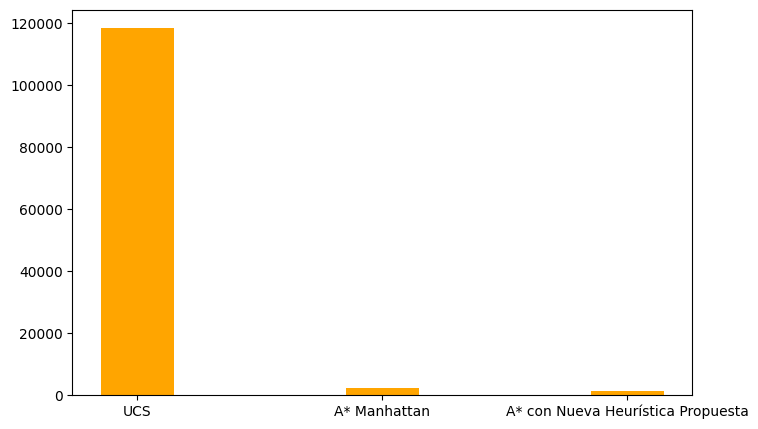

In [26]:
grafico = {'UCS': 118339,
           'A* Manhattan': 2269,
           'A* con Nueva Heurística Propuesta': 1329}
keys = list(grafico.keys())
values = list(grafico.values())
fig = plt.figure(figsize=(8,5))
plt.bar(keys, values, width=0.3, color='orange')

plt.xlabel('Algoritmo Implementado')
plt.ylabel('Costo')
plt.title('Comparación Algoritmos para Estado Inicial: [1,0,2,7,4,3,8,6,5]')
plt.show()

## __3. (1.5 Puntos) Un laberinto__

Considere el problema de navegar en un laberinto que puede representarse como un arreglo bidimensional. En el laberinto existen algunas celdas que se consideran obstáculos y no es posible atravesarlas. Un agente que se encuentra en el laberinto puede moverse a cualquiera de las 8 celdas adyacentes siempre que la celda no sea un obstáculo y no esté por fuera de los límites del laberinto. En este caso, podemos representar la posición del agente como una coordenada $(x, y)$. Por ejemplo, la coordenada $(4,2$). Adicionalmente, las acciones pueden representarse como conjunto de parejas $(dx, dy)$ en el cual $dx$ representa la variación de la posición en $x$ y $dy$ representa la variación de la posición en $y$. Por ejemplo, $(0,-1)$ representa dejar la coordenada x tal como está y disminuir la actual coordenada en $y$ en una unidad. A continuación, se presenta el laberito en que se encuentra el agente:

<center>

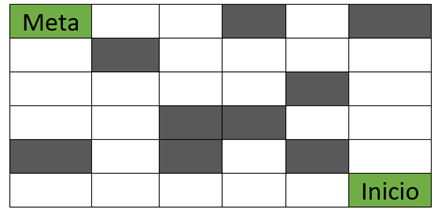

</center>
Para este problema:

* Modele este problema como un problema de búsqueda
* Implemente los algoritmos de búsquea UCS, Voraz y A* utilizando la distancia euclidiana como heurística y suponiendo que todos los movimientos cuestan 1 unidad.
* Compare la cantidad de nodos expandidos por UCS, Voraz y A*
* Construya una visualización para el laberinto, los obstaculos y la ruta encontrada. __Sugerencia__: Una forma de lograr esto es utilizar un mapa de calor.
 

In [15]:
# Solución propuesta

## __3. (2.0 puntos) Un generador de laberintos__

Generalice el problema anterior para dar al usuario la habilidad de configurar:

* El tamaño del laberinto
* El porcentaje de obstaculos en el tablero. A partir de ese valor los obstaculos se deben ubicar de manera aleatoria en las celdas disponibles.
* La ubicación inicial del agente

Para este problema:

* Modele este problema como un problema de búsqueda
* Implemente los algoritmos de búsquea UCS, Voraz y A* utilizando la distancia euclidiana como heurística y suponiendo que todos los movimientos cuestan 1 unidad.
* Compare la cantidad de nodos expandidos por UCS, Voraz y A*
* Construya una visualización para el laberinto, los obstaculos y la ruta encontrada. __Sugerencia__: Una forma de lograr esto de manera sencilla es utilizar un mapa de calor.
 

In [16]:
# Solución propuesta